# Lista 3 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

Redes Neurais
    
## 1)  Classifição utilizando MLP
- Carregue os dados contidos no arquivo ex3data1.txt. O arquivo contém duas matrizes (X e T). A matriz X possui 5000 linhas e 400 colunas representando 5000 exemplos de dados com 400 atributos cada. A matriz T possui 5000 linhas e 10 colunas representando as classes dos 5000 exemplos. Para o problema, existem 10 classes e cada vetor de T é composto por zeros, com exceção da posição no vetor referente a classe do dado. Os dados pertencem a um problema de reconhecimento de dígitos manuscritos. Cada vetor de 400 atributos representa os pixels de uma imagem 20x20 de um dígito. As classes representam os números de 0 a 9.

- Divida o conjunto de dados entre treino, validação e teste. Para este problema, utilize 4000 dados de cada classe para treino, 500 para validação e 500 para teste.

- Implemente o algoritmo do gradiente descendente para encontrar os coeficientes do classificador.

    _Para a utilização da divisão treinamento, validação e teste, os pesos devem ser obtidos somente com base no conjunto de treinamento. O conjunto de validação indicará o melhor momento para interromper o treinamento e conjunto de testes dará o desempenho final. Durante o treinamento, para cada época, verifique o erro no conjunto de treinamento e de validação. Espera-se que o erro detreinamento sempre decresça. O erro do conjunto de validação deve decrescer até um determinado ponto e depois ele irá aumentar, indicando que começa a acontecer overfitting. Utilize este ponto como critério de parada do treinamento._
    
    - **Apresentar**: O gráfico épocas x Erro quadrático médio para os conjuntos de treinamento e validação.
    - **Comentários**: Comente o gráfico obtido
    - **Apresentar**: O erro de classificação para o conjunto de teste.



### Carregando os dados:

In [1]:
import scipy.io as sio
import numpy as np


def load_data():
    mat_contents = sio.loadmat('ex3data1.mat')
    X = mat_contents['X']
    T = mat_contents['T']
    return (X, T)

def shuffle_data(X, Y):
    XY = np.concatenate((X,Y),1)
    np.random.shuffle(XY)
    X = XY[:,:400]
    Y = XY[:,400:]
    return X, Y

X, Y = load_data()

X, Y = shuffle_data(X, Y)

### Dividindo os dados em treino, validação e teste:

In [2]:
traning_x = X[:4000,:]
traning_y = Y[:4000,:]
validation_x = X[4000:4500,:]
validation_y = Y[4000:4500,:]
test_x = X[4500:5000,:]
test_y = Y[4500:5000,:]

### Implementando a rede MLP utilizando o gradiente descendente estocástico:

In [3]:
class MLP(object):
    __n_input = 0
    __n_hidden = 0
    __n_output = 0
    __l0 = None
    __l1 = None
    __saved_l0 = []
    __saved_l1 = []
    
    def __init__(self, n_input, n_hidden, n_output):
        self.__n_input = n_input
        self.__n_hidden = n_hidden
        self.__n_output = n_output
        self.__l0 = 2*np.random.random((n_input, n_hidden)) -1
        self.__l1 = 2*np.random.random((n_hidden, n_output)) -1
        
    def set_l0(l0):
        self.__l0 = np.copy(l0)
    
    def set_l1(l1):
        self.__l1 = np.copy(l1)
        
    def apply_saved_weights(self, n):
        self.__l0 = self.__saved_l0[n]
        self.__l1 = self.__saved_l1[n]
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-(z)))
    
    def d_sigmoid(self, x):
        return x*(1-x)
    
    def fire(self, x):
        input_out = self.sigmoid(x.dot(self.__l0))
        return self.sigmoid(input_out.dot(self.__l1))
    
    def fit(self, xx, yy, alpha=0.01, n_epochs=1000):
        
        errors = []
        
        for i in xrange(n_epochs):
            
            xx, yy = shuffle_data(xx, yy)
            
            
            for j in xrange(xx.shape[0]):
                
                x = np.array([xx[j]])
                y = np.array([yy[j]])
            
                k1 = self.sigmoid(x.dot(self.__l0))
                k2 = self.sigmoid(k1.dot(self.__l1))
            
            
                k2_error = y - k2
            
                k2_delta = k2_error*self.d_sigmoid(k2)

                k1_error = k2_delta.dot(self.__l1.T)
    
                k1_delta= k1_error*self.d_sigmoid(k1)
        
                self.__l1 += k1.T.dot(k2_delta)*alpha
                self.__l0 += x.T.dot(k1_delta)*alpha
            
            errors.append(np.mean((yy-self.fire(xx))**2))
        
        return errors
    
    def validation_fit(self, xt, yt, xv, yv, alpha=0.1, n_epochs=100):
        
        errors_t = []
        errors_v = []
        self.__saved_l0 = []
        self.__saved_l1 = []

        for i in xrange(n_epochs):
            
            self.fit(xt, yt, alpha, 1);
            
            error_t = yt - self.fire(xt)
            error_v = yv - self.fire(xv)
            
            errors_t.append(np.mean((error_t)**2))
            errors_v.append(np.mean((error_v)**2))
            
            self.__saved_l0.append(np.copy(self.__l0))
            self.__saved_l1.append(np.copy(self.__l1))
            
            

        return errors_t, errors_v
            
            


### Aplicando a rede neural e obetendo os gráficos EQM x época para os conjuntos de treino e validação:

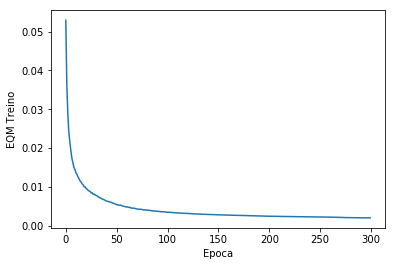

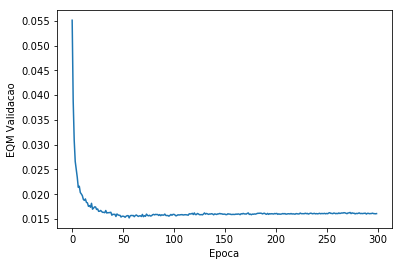

In [4]:
mlp_t = MLP(400, 16, 10) #16 neuronios na camada oculta


errors_t, errors_v = mlp_t.validation_fit(traning_x, traning_y,
                                                       validation_x, validation_y,
                                                       alpha=0.1, n_epochs=300)

import matplotlib.pyplot as plt
plt.plot(list(range(len(errors_t))), errors_t)
plt.xlabel('Epoca')
plt.ylabel('EQM Treino')
plt.show()

plt.plot(list(range(len(errors_v))), errors_v)
plt.xlabel('Epoca')
plt.ylabel('EQM Validacao')
plt.show()


### Comentário sobre os gráficos:
Nos gráficos acima podemos observar que o erro no conjunto de treino sempre diminui enquanto no conjunto de validação temos uma tendência de aumento a partir da época 50 aproximadamente.

### Erro de classificação para o conjunto de teste:

In [5]:
mlp_t.apply_saved_weights(50) #Aplicando os pesos calculados na epoca 50

y = mlp_t.fire(test_x)

total = 500.0
success_count = 0.0

for i in xrange(y.shape[0]):
    if np.argmax(y[i]) == np.argmax(test_y[i]):
        success_count += 1.0

print "Taxa de acerto para o conjunto de teste:\n", success_count/total

Taxa de acerto para o conjunto de teste:
0.922


Portanto, vemos que o erro de classificação com a configurações obtidas na época 50 ficou em torno de 7.8%


## 2)  Regressão utilizando MLP

- Carregue os dados contidos no arquivo ex3data2.mat. O arquivo contem 506 linhas e 14 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo de regressão capaz de reproduzir a variável da coluna 14 tendo como base as demais colunas. Os dados apresentados referem-se a um problema precificação casas na cidade de Boston (Boston housing dataset). A estimação do preço de cada casa é feita baseada nos outros atributos apresentados. O significado de cada atributo pode ser encontrado na arquivo “housing.names”.
- Divida o conjunto de dados entre treino, validação e teste. Para este problema, utilize 306 dados de cada classe para treino, 100 para validação e 100 para teste.
- Implemente o algoritmo do gradiente descendente para encontrar os coeficientes do classificador Para a utilização da divisão treinamento, validação e teste, os pesos devem ser obtidos somente com base no conjunto de treinamento. O conjunto de validação indicará o melhor momento para interromper o treinamento e conjunto de testes dará o desempenho final. Durante o treinamento, para cada época, verifique o erro no conjunto de treinamento e de validação. Espera-se que o erro de treinamento sempre decresça. O erro do conjunto de validação deve decrescer até um determinado ponto e depois ele irá aumentar, indicando que começa a acontecer overfitting. Utilize este ponto como critério de parada do treinamento.

    _ a utilização da divisão treinamento, validação e teste, os pesos devem ser obtidos somente com base no conjunto de treinamento. O conjunto de validação indicará o melhor momento para interromper o treinamento e conjunto de testes dará o desempenho final. Durante o treinamento, para cada época, verifique o erro no conjunto de treinamento e de validação. Espera-se que o erro de treinamento sempre decresça. O erro do conjunto de validação deve decrescer até um determinado ponto e depois ele irá aumentar, indicando que começa a acontecer overfitting. Utilize este ponto como critério de parada do treinamento._
    
    - **Apresentar**: o gráfico épocas x Erro quadrático médio para os conjuntos de treinamento e validação
    - **Comentários**: Comente o gráfico obtido
    - **Apresentar**: Um gráfico mostrando os preços das casas para o conjunto de teste e o preço predito pelo seu modelo para os mesmos dados.
    - **Comentários**: O modelo de regressão parece estar funcionando?




### Carregando e normalizando os dados:

In [6]:
data = np.genfromtxt("ex3data2.data")

np.random.shuffle(data)
X = data[:,:-1]
Y = np.array([data[:,-1]]).T

max_X = np.amax(X, axis=0)
max_Y = np.amax(Y, axis=0)

X = X/max_X
Y = Y/max_Y



### Dividindo em treino, validação e teste:

In [7]:
traning_x = X[:306,:]
traning_y = Y[:306,:]
validation_x = X[306:406,:]
validation_y = Y[306:406,:]
test_x = X[406:506,:]
test_y = Y[406:506,:]

### Aplicando a rede neural e obtendo os gráficos EQM x época para os conjuntos de treino e validação:

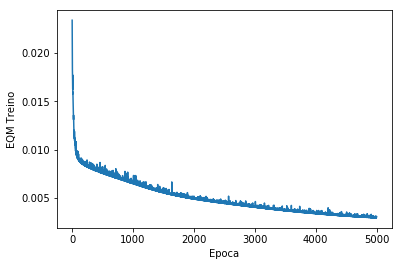

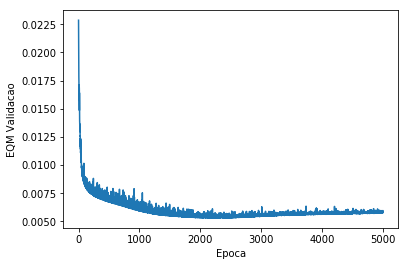

In [8]:
def shuffle_data(X, Y):
    XY = np.concatenate((X,Y),1)
    np.random.shuffle(XY)
    X = XY[:,:-1]
    Y = np.array([XY[:,-1]]).T
    return X, Y

mlp_t = MLP(13, 16, 1) #16 neuronios na camada oculta


errors_t, errors_v = mlp_t.validation_fit(traning_x, traning_y,
                                                       validation_x, validation_y,
                                                       alpha=0.1, n_epochs=5000)


plt.plot(list(range(len(errors_t))), errors_t)
plt.xlabel('Epoca')
plt.ylabel('EQM Treino')
plt.show()

plt.plot(list(range(len(errors_v))), errors_v)
plt.xlabel('Epoca')
plt.ylabel('EQM Validacao')
plt.show()

### Comentário sobre os gráficos:
Nos gráficos acima podemos observar que o erro no conjunto de treino sempre diminui enquanto no conjunto de validação temos uma tendência de aumento a partir da época 2500 aproximadamente.

### Gráfico dos preços preditos (azul) comparados com os reais (laranja):

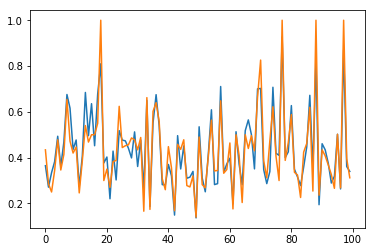

In [17]:
mlp_t.apply_saved_weights(2500) #Aplicando os pesos calculados na epoca 2500

y = mlp_t.fire(test_x)

plt.plot(y[:, 0])
plt.plot(test_y[:, 0])
plt.show()

### Comentário:
O modelo de regressão parece funcionar bem, pois as curvas de ambos os gráficos estão parecidas.